In [1]:
import glob 

import xarray
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

# Open HSRL Files

In [9]:
file_pattern = '/home/svisaga/MUSICA_ANALYSES/curtain_tracks/hsrl_*_curtain_CAMP2Ex.nc'
file_list = glob.glob(file_pattern)
# Open multiple NetCDF files and combine them into a single dataset
ds_obs = xarray.open_mfdataset(file_list,combine='by_coords')
ds_obs


<xarray.Dataset>
Dimensions:       (Altitude: 1058, Date: 47316)
Coordinates:
  * Altitude      (Altitude) float64 -500.0 -485.0 ... 9.483e+03 9.498e+03
  * Date          (Date) object '2019-08-24 22:08:21' ... '2019-10-05 07:18:11'
Data variables:
    hsrl_532_ext  (Date, Altitude) float64 dask.array<chunksize=(668, 1058), meta=np.ndarray>

In [22]:
# Calculate the average per altitude
average_per_altitude = ds_obs.mean(dim='Date')
std_per_altitude = ds_obs.std(dim='Date')
std_per_altitude['hsrl_532_ext']

<xarray.DataArray 'hsrl_532_ext' (Altitude: 1058)>
dask.array<_sqrt, shape=(1058,), dtype=float64, chunksize=(1058,), chunktype=numpy.ndarray>
Coordinates:
  * Altitude  (Altitude) float64 -500.0 -485.0 -470.0 ... 9.483e+03 9.498e+03

/home/svisaga/miniconda3/envs/cmp/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


Text(0.5, 0, 'EXTINCTION (km-1)')

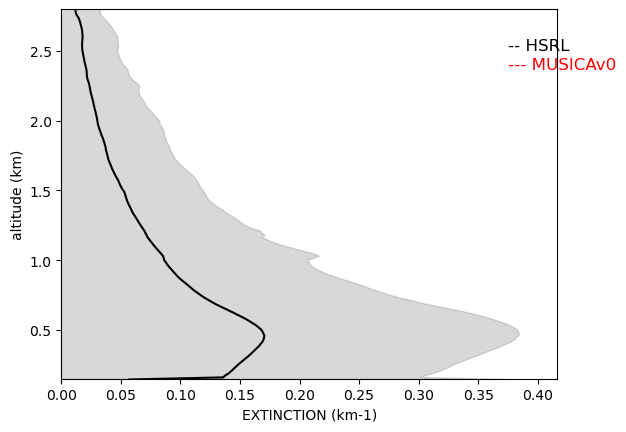

In [30]:
fig, ax1 = plt.subplots()
ax1.plot(average_per_altitude['hsrl_532_ext'], average_per_altitude['Altitude']/1000, color='k')
ax1.fill_betweenx(average_per_altitude['Altitude']/ 1000,
                  average_per_altitude['hsrl_532_ext'] - std_per_altitude['hsrl_532_ext'],
                 average_per_altitude['hsrl_532_ext'] + std_per_altitude['hsrl_532_ext'],
                  color='gray', alpha=0.3, label='Std Dev')
ax1.text(0.9, 0.9, '-- HSRL', transform=ax1.transAxes, fontsize=12,
        verticalalignment='center',color='k')
# Add red color to the first line
ax1.text(0.9, 0.85, '--- MUSICAv0', transform=ax1.transAxes, fontsize=12,
        verticalalignment='center', color='red')

plt.ylim(0.15,2.8)
plt.xlim(0,)
plt.ylabel('altitude (km)')
plt.xlabel('EXTINCTION (km-1)')


# Open the model file here.

In [36]:

# Use glob to match files with a wildcard pattern
file_pattern = '/home/svisaga/MUSICA_ANALYSES/curtain_tracks/p3_2019-*curtain*.nc'
file_list = glob.glob(file_pattern)
# Open multiple NetCDF files and combine them into a single dataset
ds_mod = xarray.open_mfdataset(file_list,combine='by_coords')


# Print the dataset to inspect the contents
ds_mod


<xarray.Dataset>
Dimensions:      (datetime: 534028, nl: 32)
Coordinates:
  * datetime     (datetime) object '2019-08-24 22:11:08' ... '2019-10-05 07:2...
Dimensions without coordinates: nl
Data variables: (12/30)
    zco          (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    xco          (datetime) float64 dask.array<chunksize=(236852,), meta=np.ndarray>
    yco          (datetime) float64 dask.array<chunksize=(236852,), meta=np.ndarray>
    mlh_hsrl     (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    bc_sp2       (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    oa_ams       (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    ...           ...
    nox_mod      (datetime, nl) float64 dask.array<chunksize=(6532, 32), meta=np.ndarray>
    noy_mod      (datetime, nl) float64 dask.array<chunksize=(6532, 32), meta=np.ndarray>
    so2_mod      (datetime, nl) float64 dask.array<chunksize=(6532, 32), meta=np.ndarray>
    EXTINCT_mod  (datetime, nl) float64 dask.array<chunksize=(6532, 32), meta=np.ndarray>
    AODVIS_mod   (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    pblh_mod     (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>

In [37]:
# Find the intersection of dates
common_dates = np.intersect1d(ds_obs['Date'],ds_mod['datetime'].values)

# Filter the model dataset using the observation dates
ds_mod_ = ds_mod.sel(datetime=common_dates)
ds_mod_

<xarray.Dataset>
Dimensions:      (datetime: 47199, nl: 32)
Coordinates:
  * datetime     (datetime) object '2019-08-24 22:11:11' ... '2019-10-05 07:1...
Dimensions without coordinates: nl
Data variables: (12/30)
    zco          (datetime) float64 dask.array<chunksize=(641,), meta=np.ndarray>
    xco          (datetime) float64 dask.array<chunksize=(19826,), meta=np.ndarray>
    yco          (datetime) float64 dask.array<chunksize=(19826,), meta=np.ndarray>
    mlh_hsrl     (datetime) float64 dask.array<chunksize=(641,), meta=np.ndarray>
    bc_sp2       (datetime) float64 dask.array<chunksize=(641,), meta=np.ndarray>
    oa_ams       (datetime) float64 dask.array<chunksize=(641,), meta=np.ndarray>
    ...           ...
    nox_mod      (datetime, nl) float64 dask.array<chunksize=(641, 32), meta=np.ndarray>
    noy_mod      (datetime, nl) float64 dask.array<chunksize=(641, 32), meta=np.ndarray>
    so2_mod      (datetime, nl) float64 dask.array<chunksize=(641, 32), meta=np.ndarray>
    EXTINCT_mod  (datetime, nl) float64 dask.array<chunksize=(641, 32), meta=np.ndarray>
    AODVIS_mod   (datetime) float64 dask.array<chunksize=(641,), meta=np.ndarray>
    pblh_mod     (datetime) float64 dask.array<chunksize=(641,), meta=np.ndarray>

In [38]:
ds_mod_['datetime'] = pd.to_datetime(ds_mod_['datetime'].values)

In [40]:
variables = ['alt_mod', 'EXTINCT_mod']
ds_mod_ = ds_mod[variables]
df_mod = ds_mod_.to_dataframe().reset_index()
df_mod['datetime'] = pd.to_datetime(df_mod['datetime'])
df_mod


,datetime,nl,alt_mod,EXTINCT_mod
0,2019-08-24 22:11:08,0,232.023185,1.040687e-04
1,2019-08-24 22:11:08,1,379.017085,4.552231e-05
2,2019-08-24 22:11:08,2,552.111659,4.137563e-05
3,2019-08-24 22:11:08,3,751.083869,3.724879e-05
4,2019-08-24 22:11:08,4,975.388085,2.274171e-05
...,...,...,...,...
17088891,2019-10-05 07:29:24,27,22917.139551,8.699894e-08
17088892,2019-10-05 07:29:24,28,25220.223301,4.051222e-08
17088893,2019-10-05 07:29:24,29,28623.446934,1.090914e-08
17088894,2019-10-05 07:29:24,30,32923.073438,3.377105e-09


In [41]:
constant_altitudes = ds_obs.Altitude.values

# Create an empty DataFrame to store the resampled data
df_mod_interp = []

# Group the data by datetime
grouped = df_mod.groupby('datetime')

for name, group in grouped:
    # Sort by altitude to ensure monotonic input for interpolation
    group_sorted = group.sort_values('alt_mod')

    # Get min and max altitude for this group
    min_alt = group_sorted['alt_mod'].min()
    max_alt = group_sorted['alt_mod'].max()

    # Clip constant_altitudes to the valid range
    valid_altitudes = constant_altitudes[
        (constant_altitudes >= min_alt) & (constant_altitudes <= max_alt)
    ]

    # Interpolate only within the valid range
    interpolated = np.interp(valid_altitudes, group_sorted['alt_mod'], group_sorted['EXTINCT_mod'])

    # Create a DataFrame for the interpolated data
    interpolated_df = pd.DataFrame({
        'datetime': name,
        'altitude': valid_altitudes,
        'EXTINCT_mod': interpolated
    })

    df_mod_interp.append(interpolated_df)

df_mod_interp = pd.concat(df_mod_interp, ignore_index=True)
df_mod_interp

,datetime,altitude,EXTINCT_mod
0,2019-08-24 22:11:08,234.491522,1.030856e-04
1,2019-08-24 22:11:08,249.481145,9.711534e-05
2,2019-08-24 22:11:08,264.470768,9.114511e-05
3,2019-08-24 22:11:08,279.460391,8.517487e-05
4,2019-08-24 22:11:08,294.450014,7.920463e-05
...,...,...,...
543791853,2019-10-05 07:29:24,9438.119983,3.549937e-07
543791854,2019-10-05 07:29:24,9453.109606,3.542274e-07
543791855,2019-10-05 07:29:24,9468.099228,3.534610e-07
543791856,2019-10-05 07:29:24,9483.088851,3.526947e-07


In [43]:
grouped_mean = df_mod_interp.groupby('altitude').mean().reset_index()
grouped_std = df_mod_interp.groupby('altitude').std().reset_index()

/tmp/ipykernel_1258724/1065280935.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = df_mod_interp.groupby('altitude').mean().reset_index()
/tmp/ipykernel_1258724/1065280935.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_std = df_mod_interp.groupby('altitude').std().reset_index()


/home/svisaga/miniconda3/envs/cmp/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


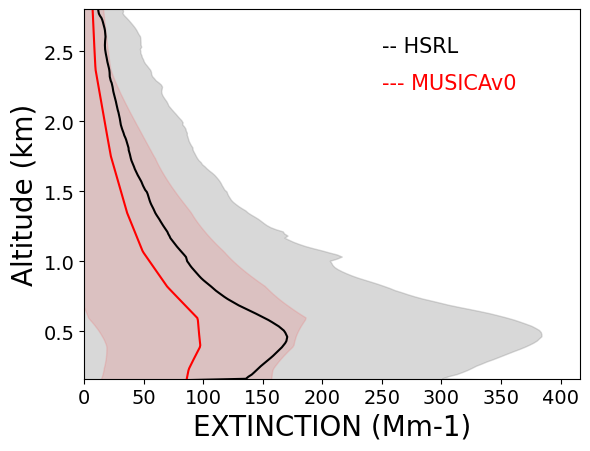

In [59]:
fig, ax1 = plt.subplots()
ax1.plot(average_per_altitude['hsrl_532_ext']*1000, average_per_altitude['Altitude']/1000, color='k')
ax1.fill_betweenx(average_per_altitude['Altitude']/ 1000,
                  (1000)*(average_per_altitude['hsrl_532_ext'] - std_per_altitude['hsrl_532_ext']),
                 (1000)*(average_per_altitude['hsrl_532_ext'] + std_per_altitude['hsrl_532_ext']),
                  color='gray', alpha=0.3, label='Std Dev')

ax1.plot( grouped_mean.EXTINCT_mod*1E6, grouped_mean.altitude/1000,color='red', label='Grouped Mean Extinction')
ax1.fill_betweenx(grouped_mean.altitude/1000,
                  1E6*(grouped_mean.EXTINCT_mod.values - grouped_std.EXTINCT_mod.values),
                  1E6*(grouped_mean.EXTINCT_mod.values + grouped_std.EXTINCT_mod.values),
                  color='red', alpha=0.1, label='Std Dev')


ax1.text(0.6, 0.9, '-- HSRL', transform=ax1.transAxes, fontsize=15,
        verticalalignment='center',color='k')
# Add red color to the first line
ax1.text(0.6, 0.8, '--- MUSICAv0', transform=ax1.transAxes, fontsize=15,
        verticalalignment='center', color='red')

plt.ylim(0.16,2.8)
plt.xlim(0,)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Altitude (km)', fontsize=20)
plt.xlabel('EXTINCTION (Mm-1)', fontsize=20)

plt.savefig(f'img/Figure5_AMSPaper.png',dpi=300,bbox_inches='tight')



In [42]:
ds_mod_interp = df_mod_interp.set_index(['datetime', 'altitude']).to_xarray()
ds_mod_interp


<xarray.Dataset>
Dimensions:      (datetime: 534028, altitude: 1020)
Coordinates:
  * datetime     (datetime) datetime64[ns] 2019-08-24T22:11:08 ... 2019-10-05...
  * altitude     (altitude) float64 69.61 84.6 99.58 ... 9.483e+03 9.498e+03
Data variables:
    EXTINCT_mod  (datetime, altitude) float64 nan nan ... 3.527e-07 3.519e-07